In [60]:
import shapefile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *
import geopandas as gpd
import string
from scipy.stats import linregress

# EX1:
    Problem 1: Island Missing
    Problem 2: the size of the map, the parallel and meridiornal grid.
    Problem 3: some weird lines in the map, especially when we have islands.

In [61]:
# Open the shapefile using the pyshp library
sf = shapefile.Reader('gadm41/gadm41_VNM_1.shp')

# Get the shapefile records
records = sf.records()

# Try to print the first two records
print ((records[0:2]))

# Extract province names (I guess the record 4 is the name of the provinces)
province_names = [record[4] for record in records]

# Now check if we extract the correct records :))
print (province_names)

[Record #0: ['VNM.1_1', 'VNM', 'Vietnam', 'An Giang', 'An Giang', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.AG', 'VN-44'], Record #1: ['VNM.7_1', 'VNM', 'Vietnam', 'Bà Rịa - Vũng Tàu', 'Ba Ria - Vung Tau', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.BV', 'NA']]
['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 'Ha Nam', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Tra Vinh', 'Tuyen Quan

Text(0.5, 1.0, 'Vietnam provinces')

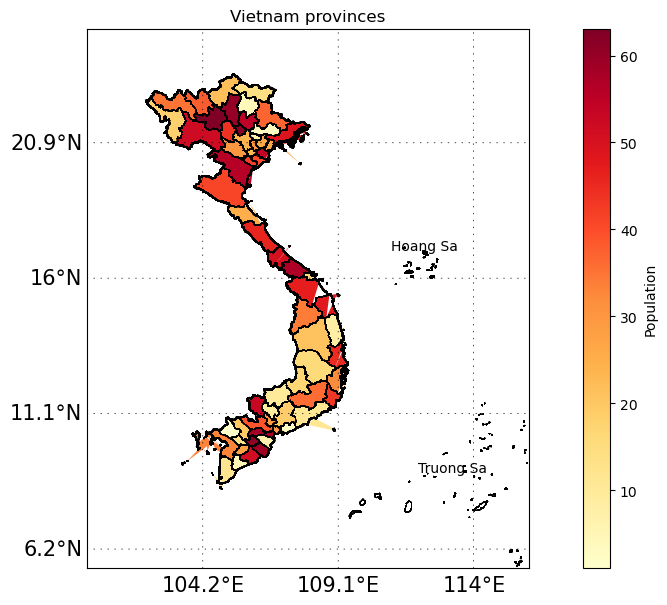

In [62]:
fig, ax = plt.subplots(1, figsize=(14, 7))
lon_min = 100
lon_max = 116
lat_min = 5.5
lat_max = 25

popular = arange(1, 64, 1)

map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution=None,epsg=4326)
parallels = arange(-180.,180, 3) 	#lat
meridians = arange(-180.,180., 3)
parallels = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
norm = Normalize(vmin=min(popular), vmax=max(popular))
for shape, pop in zip(sf.shapes(), popular): 
    map2.readshapefile('gadm41/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
    map2.readshapefile('gadm41/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
    map2.readshapefile('haidao/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)
    poly = Polygon(shape.points, fill=True, edgecolor='None', facecolor=plt.cm.YlOrRd(norm(pop)))
    ax.add_patch(poly)

ax.annotate('Hoang Sa', xy=(111, 17), xycoords='data', xytext=(111, 17), textcoords='data')
ax.annotate('Truong Sa', xy=(112, 9), xycoords='data', xytext=(112, 9), textcoords='data')


sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax).set_label('Population')

# plot the shapefile polygons
plt.title('Vietnam provinces')  

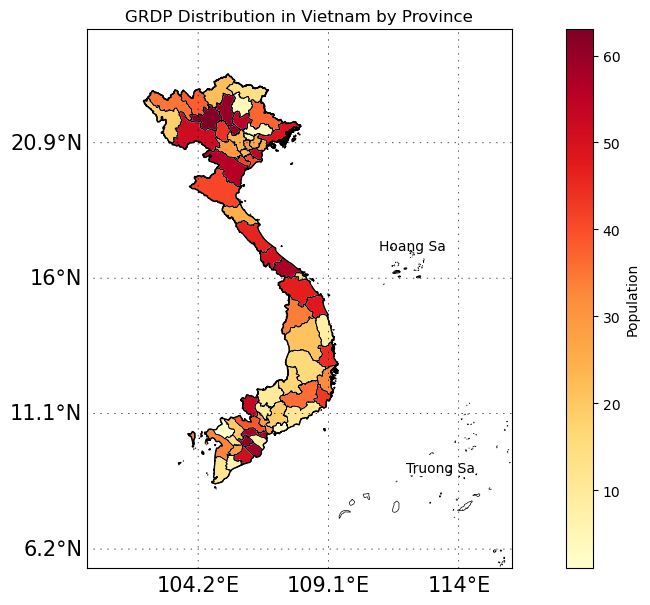

In [63]:
# EX1: Using the geopandas
data_VN = gpd.read_file('gadm41/gadm41_VNM_1.shp')
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
lon_min = 100
lon_max = 116
lat_min = 5.5
lat_max = 25

popular = arange(1, 64, 1)

map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution=None,epsg=4326)

parallels = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
map2.readshapefile('haidao/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)
norm = Normalize(vmin=min(popular), vmax=max(popular))
ax.annotate('Hoang Sa', xy=(111, 17), xycoords='data', xytext=(111, 17), textcoords='data')
ax.annotate('Truong Sa', xy=(112, 9), xycoords='data', xytext=(112, 9), textcoords='data')

# Plot the map with color-coded provinces
data_VN.plot(column=popular, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
plt.colorbar(sm, ax=ax).set_label('Population')
ax.set_title('GRDP Distribution in Vietnam by Province')
plt.show()

# EX2:
    Problem 1: This map does not have meridians (lines of longitude) and parallels (lines of latitude) yet. Add it
    Problem 2: add the islands also..
    Problem 3: Change the min and max of colorbar to min = 0, max = 70

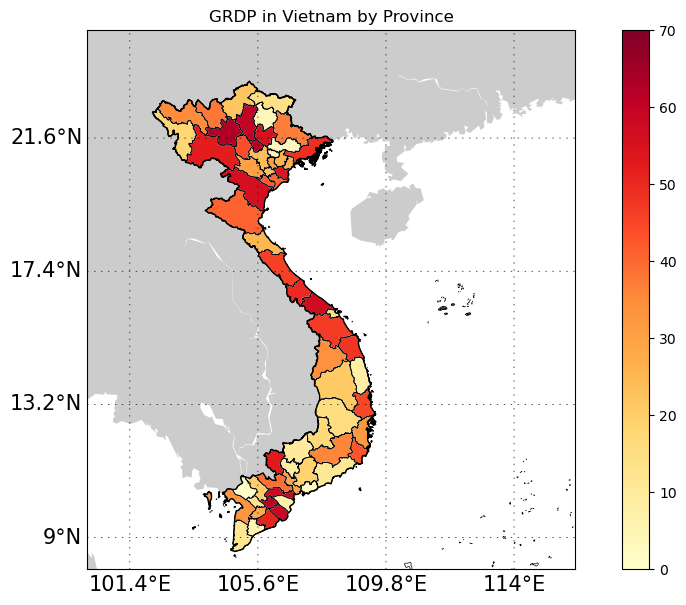

In [64]:
# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file('gadm41/gadm41_VNM_1.shp')

# Create a figure and axis
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1)

lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 25

map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)

map2.fillcontinents()

parallels = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
map2.readshapefile('haidao/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)

# Plot the map with color-coded provinces
vietnam.plot(column=arange(1, 64, 1), cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax=70)

# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
fig.subplots_adjust(right=0.8)

plt.show()


# EX3
    Problem 1: calculate mean value of points inside the shapefile for each province
    Problem 2: plot it on map

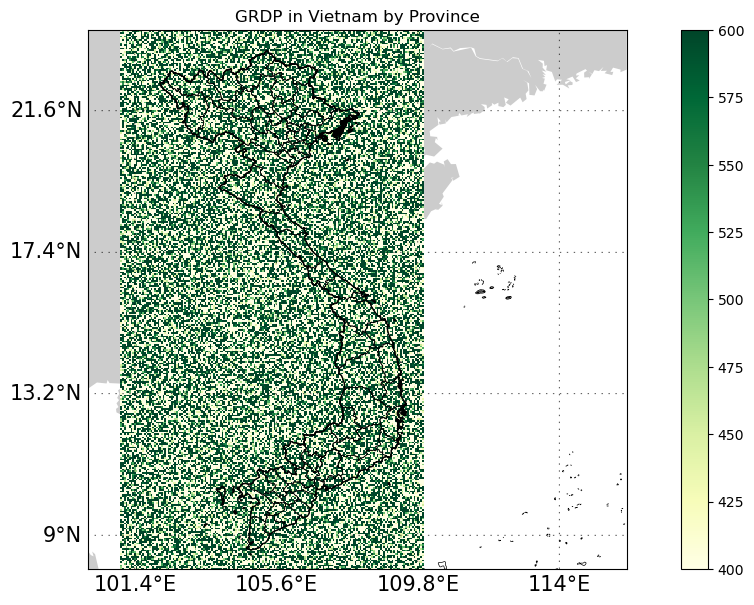

In [66]:
# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file('gadm41/gadm41_VNM_1.shp')

x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

x_axis, y_axis = meshgrid(x_axis, y_axis)
random.seed(seed=180793)
data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis, 1)))

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(14, 7))

lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 25

map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)

map2.fillcontinents()
cm = plt.pcolormesh(x_axis, y_axis, data, vmin=400, vmax=600, cmap = 'YlGn')

parallels = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(-180,180, around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
map2.readshapefile('haidao/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)


# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
ax.set_xlim(100., 116)
ax.set_ylim(8, 24)

# Show the map
plt.colorbar(cm, ax=ax, ticks= linspace(400, 600, num=9, endpoint=True))
plt.show()

# EX4
    The data below is the salary per month of 10 people from 1980 - 2018.
    Plot the revenue
    Check the linear trend. Plot a straight line to show the trend
    Check if the trend is significant (p<0.05) or not. Yes = solid line, No = dashed line

C:\Users\J3rrytm\AppData\Local\Temp\ipykernel_5052\2313515797.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(arange(0,26,5))


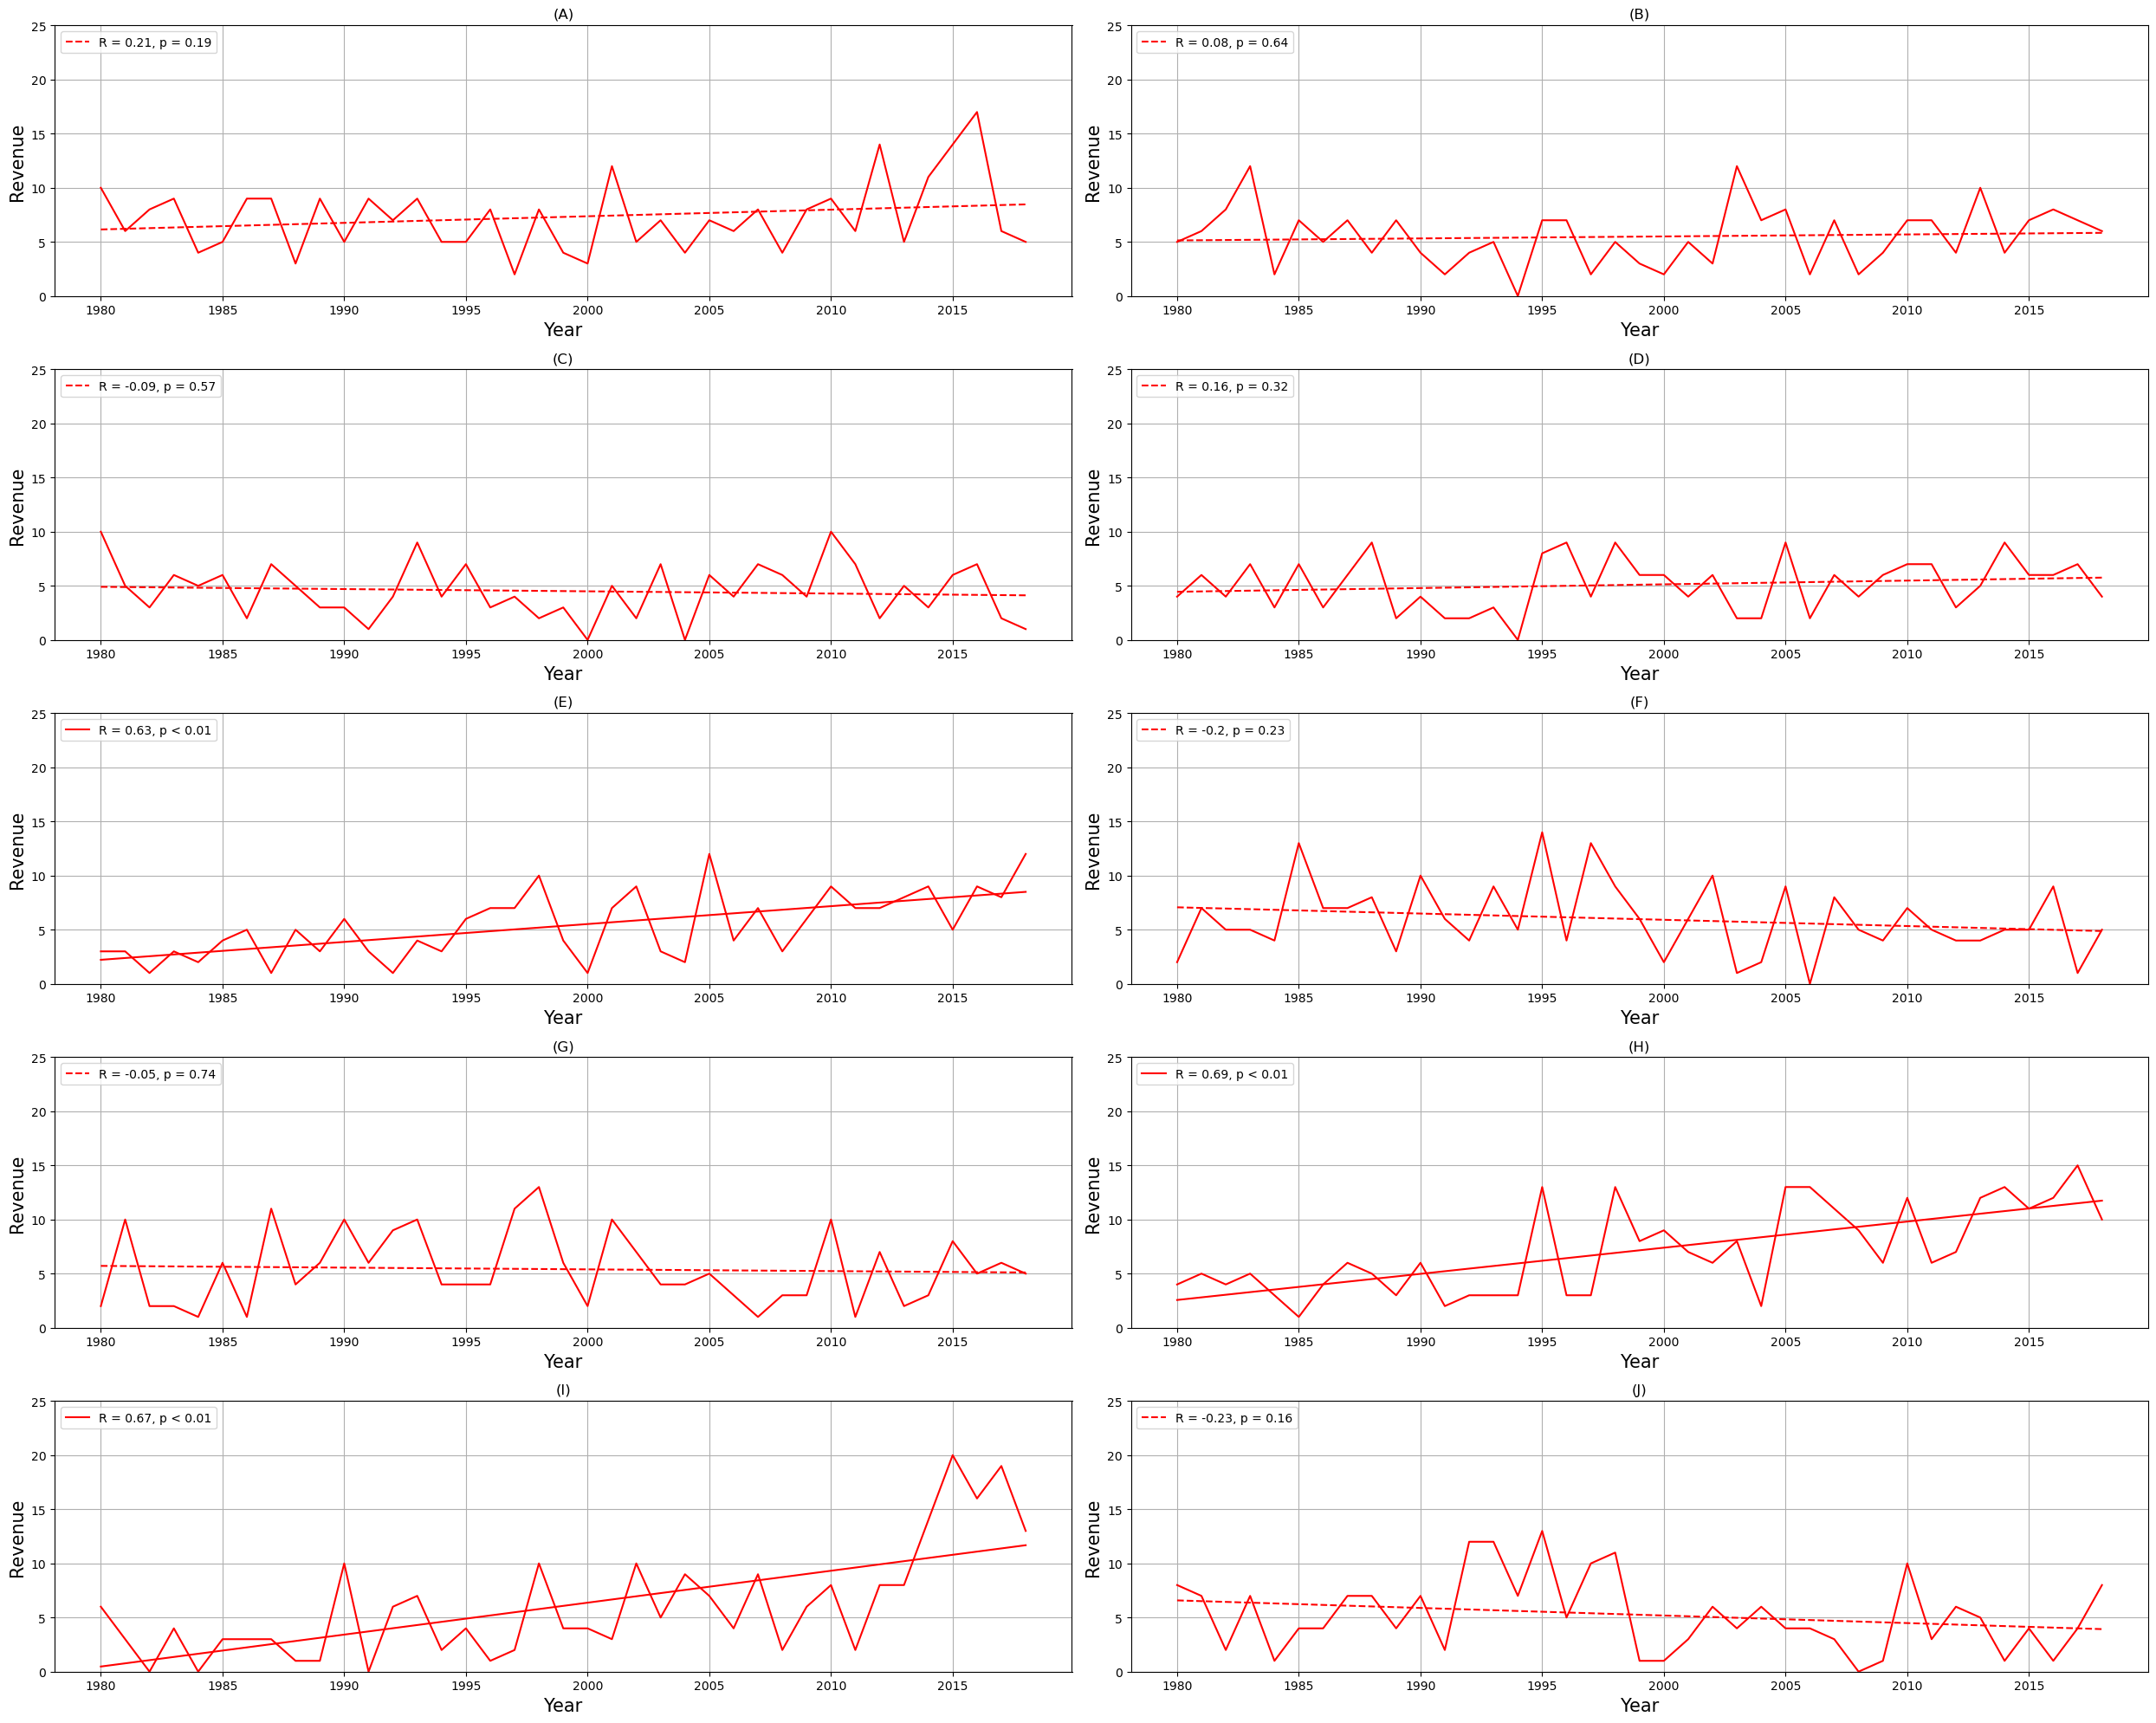

Significance Results:
Person 1: No
Person 2: No
Person 3: No
Person 4: No
Person 5: Yes
Person 6: No
Person 7: No
Person 8: Yes
Person 9: Yes
Person 10: No


In [67]:
A = [10, 6, 8, 9, 4, 5, 9, 9, 3, 9, 5, 9, 7, 9, 5, 5, 8, 2, 8, 4, 3, 12, 5, 7, 4, 7, 6, 8, 4, 8, 9, 6, 14, 5, 11, 14, 17, 6, 5,]
B = [ 5, 6, 8, 12, 2, 7, 5, 7, 4, 7, 4, 2, 4, 5, 0, 7, 7, 2, 5, 3, 2, 5, 3, 12, 7, 8, 2, 7, 2, 4, 7, 7, 4, 10, 4, 7, 8, 7, 6,]
C = [10, 5, 3, 6, 5, 6, 2, 7, 5, 3, 3, 1, 4, 9, 4, 7, 3, 4, 2, 3, 0, 5, 2, 7, 0, 6, 4, 7, 6, 4, 10, 7, 2, 5, 3, 6, 7, 2, 1,]
D = [4, 6, 4, 7, 3, 7, 3, 6, 9, 2, 4, 2, 2, 3, 0, 8, 9, 4, 9, 6, 6, 4, 6, 2, 2, 9, 2, 6, 4, 6, 7, 7, 3, 5, 9, 6, 6, 7, 4,]
E = [ 3, 3, 1, 3, 2, 4, 5, 1, 5, 3, 6, 3, 1, 4, 3, 6, 7, 7, 10, 4, 1, 7, 9, 3, 2, 12, 4, 7, 3, 6, 9, 7, 7, 8, 9, 5, 9, 8, 12,]
F = [ 2, 7, 5, 5, 4, 13, 7, 7, 8, 3, 10, 6, 4, 9, 5, 14, 4, 13, 9, 6, 2, 6, 10, 1, 2, 9, 0, 8, 5, 4, 7, 5, 4, 4, 5, 5, 9, 1, 5,]
G = [ 2, 10, 2, 2, 1, 6, 1, 11, 4, 6, 10, 6, 9, 10, 4, 4, 4, 11, 13, 6, 2, 10, 7, 4, 4, 5, 3, 1, 3, 3, 10, 1, 7, 2, 3, 8, 5, 6, 5,]
H = [ 4, 5, 4, 5, 3, 1, 4, 6, 5, 3, 6, 2, 3, 3, 3, 13, 3, 3, 13, 8, 9, 7, 6, 8, 2, 13, 13, 11, 9, 6, 12, 6, 7, 12, 13, 11, 12, 15, 10,]
I = [ 6, 3, 0, 4, 0, 3, 3, 3, 1, 1, 10, 0, 6, 7, 2, 4, 1, 2, 10, 4, 4, 3, 10, 5, 9, 7, 4, 9, 2, 6, 8, 2, 8, 8, 14, 20, 16, 19, 13,]
J = [ 8, 7, 2, 7, 1, 4, 4, 7, 7, 4, 7, 2, 12, 12, 7, 13, 5, 10, 11, 1, 1, 3, 6, 4, 6, 4, 4, 3, 0, 1, 10, 3, 6, 5, 1, 4, 1, 4, 8,]
data = [A,B,C,D,E,F,G,H,I,J]
alphabet = list(string.ascii_uppercase)
alphabet = alphabet[0:10]
fig = plt.figure(figsize=(25,20))
datalist=[]

for i in data:
  i = [float(j) for j in i]
  datalist.append(i)
years = arange(1980,2019,1)

for i in range(len(data)):
  ax = fig.add_subplot(5,2,i+1)
  linear = linregress(years,datalist[i])
  y = linear.slope*years+linear.intercept
  ax.plot(years,datalist[i],color='r')
  if (linear.pvalue < 0.05 and linear.pvalue > 0.01):
    ax.plot(years,y,color = 'r',label = f"R = {round(linear.rvalue,2)}, p = {round(linear.pvalue,2)}")
  elif (linear.pvalue <0.01):
    ax.plot(years,y,color = 'r',label = f"R = {round(linear.rvalue,2)}, p < 0.01")
  else:
    ax.plot(years,y,color = 'r', linestyle='dashed',label = f"R = {round(linear.rvalue,2)}, p = {round(linear.pvalue,2)}")
  ax.set_title(f'({alphabet[i]})')
  ax.set_xlabel('Year',size = 15)
  ax.set_ylabel('Revenue', size = 15)
  ax.set_ylim(0,25)
  ax.set_yticklabels(arange(0,26,5))
  ax.grid(True)
  ax.legend(loc = 'upper left',)
# plot
plt.tight_layout()
plt.show()

significance_results = []
for i, person_data in enumerate(data):
    # Calculate the linear trend
    slope, intercept, r_value, p_value, std_err = linregress(years, person_data)
    # Check if the trend is significant (p < 0.05)
    if p_value < 0.05:
        ax.plot(years, intercept + slope * (years), 'r-', label=f'Trend (p={p_value:.2f})')
    else:
        ax.plot(years, intercept + slope * (years), 'r--', label=f'Trend (p={p_value:.2f})')

    significance_results.append(p_value < 0.05)
print("Significance Results:")
for i, is_significant in enumerate(significance_results):
    print(f'Person {i+1}: {"Yes" if is_significant else "No"}')